# Dimensionality Reduction

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Load the Olivetti Faces dataset
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target

# Filter subjects for simplicity
selected_subjects = [1, 8, 13, 21, 26, 27, 33, 35]

# Filter the dataset
selected_indices = np.isin(y, selected_subjects)
X_selected = X[selected_indices]
y_selected = y[selected_indices]

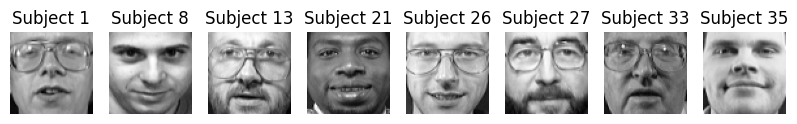

In [3]:
# Plot one image per selected subject
plt.figure(figsize=(10, 3))
for i, subject in enumerate(selected_subjects):
    # Find the first occurrence of the subject in the filtered dataset
    index = np.where(y_selected == subject)[0][0]  
    # Reshape the image to 64x64
    image = X_selected[index].reshape(64, 64)  

    plt.subplot(1, len(selected_subjects), i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Subject {subject}')
    plt.axis('off')

plt.show()

In [4]:
# Build a PCA model
#X_pca = PCA(n_components=2).fit_transform(X_selected)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

In [5]:
# Create a DataFrame for plotting
df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df['Person'] = y_selected.astype(str)
df.head(2)

,PCA1,PCA2,Person
0,-2.126526,0.821273,1
1,-1.903254,-0.577886,1


In [6]:
# Create the scatterplot
fig_pca = px.scatter(df, x='PCA1', y='PCA2', color='Person',
                 color_continuous_scale=px.colors.sequential.Plotly3,
                 width=600, 
                 title='PCA visualization of Olivetti Faces dataset',
                 labels={'Person': 'Person ID'})
fig_pca.update_traces(marker=dict(size=8))
fig_pca.show()

In [7]:
# Apply t-SNE for dimensionality reduction
#X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_selected)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_selected)

In [8]:
# Adding the t-SNE components to the DataFrame
df['t-SNE1'] = X_tsne[:, 0]
df['t-SNE2'] = X_tsne[:, 1]
df.head(2)

,PCA1,PCA2,Person,t-SNE1,t-SNE2
0,-2.126526,0.821273,1,7.576077,0.556396
1,-1.903254,-0.577886,1,8.020506,-0.613824


In [9]:
# Create the new scatterplot 
fig_pca = px.scatter(df, x='t-SNE1', y='t-SNE2', color='Person',
                 color_continuous_scale=px.colors.sequential.Plotly3,
                 width=600, 
                 title='t-SNE visualization of Olivetti Faces dataset',
                 labels={'Person': 'Person ID'})
fig_pca.update_traces(marker=dict(size=8))
fig_pca.show()